#Importing Libraries and Loading Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('East_African_countries_data.csv')

print("Data loaded successfully. First 5 rows:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

Data loaded successfully. First 5 rows:
| psu   | new_psu   | country   | DHSCLUST   | sampwt   | newcaseid_1   | anc_timing   | residence   | education_1          | birth_order   | wealth   | household_size_g   | household_sex   | age_group_new_cat   |
|:------|:----------|:----------|:-----------|:---------|:--------------|:-------------|:------------|:---------------------|:--------------|:---------|:-------------------|:----------------|:--------------------|
| 1     | 1         | DRC       | 1          | 1.0981   | 1 7 4         | early        | urban       | secondary and higher | one           | rich     | 5 or more          | male            | 15-24               |
| 1     | 1         | DRC       | 1          | 1.0981   | 1 19 2        | late         | urban       | secondary and higher | two           | rich     | 5 or more          | male            | 25-49               |
| 1     | 1         | DRC       | 1          | 1.0981   | 1 45 5        | early        | urban       | s

In [2]:
print("\nInformation about the dataset (data types and non-null counts):")
df.info()

print("\nChecking for missing values (sum per column):")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Information about the dataset (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42719 entries, 0 to 42718
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   psu                42719 non-null  int64  
 1   new_psu            42719 non-null  int64  
 2   country            42719 non-null  object 
 3   DHSCLUST           42719 non-null  int64  
 4   sampwt             42719 non-null  float64
 5   newcaseid_1        42719 non-null  object 
 6   anc_timing         42719 non-null  object 
 7   residence          42719 non-null  object 
 8   education_1        42719 non-null  object 
 9   birth_order        42719 non-null  object 
 10  wealth             42719 non-null  object 
 11  household_size_g   42719 non-null  object 
 12  household_sex      42719 non-null  object 
 13  age_group_new_cat  42719 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 4.6

#Descriptive Statistics for Numerical and Categorical Columns

In [5]:
print("\nDescriptive statistics for numerical columns:")
print(df.describe().to_markdown(numalign="left", stralign="left"))

print("\nValue counts for key categorical columns:")
categorical_cols = ['country', 'anc_timing', 'residence', 'education_1', 'birth_order', 'wealth', 'household_size_g', 'household_sex', 'age_group_new_cat']

for col in categorical_cols:
    print(f"\n--- Value counts for '{col}' ---")
    print(df[col].value_counts().to_markdown(numalign="left", stralign="left"))


Descriptive statistics for numerical columns:
|       | psu     | new_psu   | DHSCLUST   | sampwt   |
|:------|:--------|:----------|:-----------|:---------|
| count | 42719   | 42719     | 42719      | 42719    |
| mean  | 446.175 | 1777.82   | 446.175    | 1.00625  |
| std   | 403.998 | 1197.2    | 403.998    | 0.876412 |
| min   | 1       | 1         | 1          | 0.027451 |
| 25%   | 163     | 627       | 163        | 0.428642 |
| 50%   | 319     | 1723      | 319        | 0.818634 |
| 75%   | 531     | 2879      | 531        | 1.28791  |
| max   | 1612    | 3805      | 1612       | 13.5635  |

Value counts for key categorical columns:

--- Value counts for 'country' ---
| country   | count   |
|:----------|:--------|
| KEN       | 17288   |
| DRC       | 13500   |
| TZA       | 11931   |

--- Value counts for 'anc_timing' ---
| anc_timing   | count   |
|:-------------|:--------|
| late         | 25497   |
| early        | 17222   |

--- Value counts for 'residence' ---
| residen

#Visualizing Distributions of Key Categorical Variables

/tmp/ipython-input-6-512179424.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-6-512179424.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-6-512179424.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-6-512179424.py:10: FutureWarning: 

Passing `palette` wit

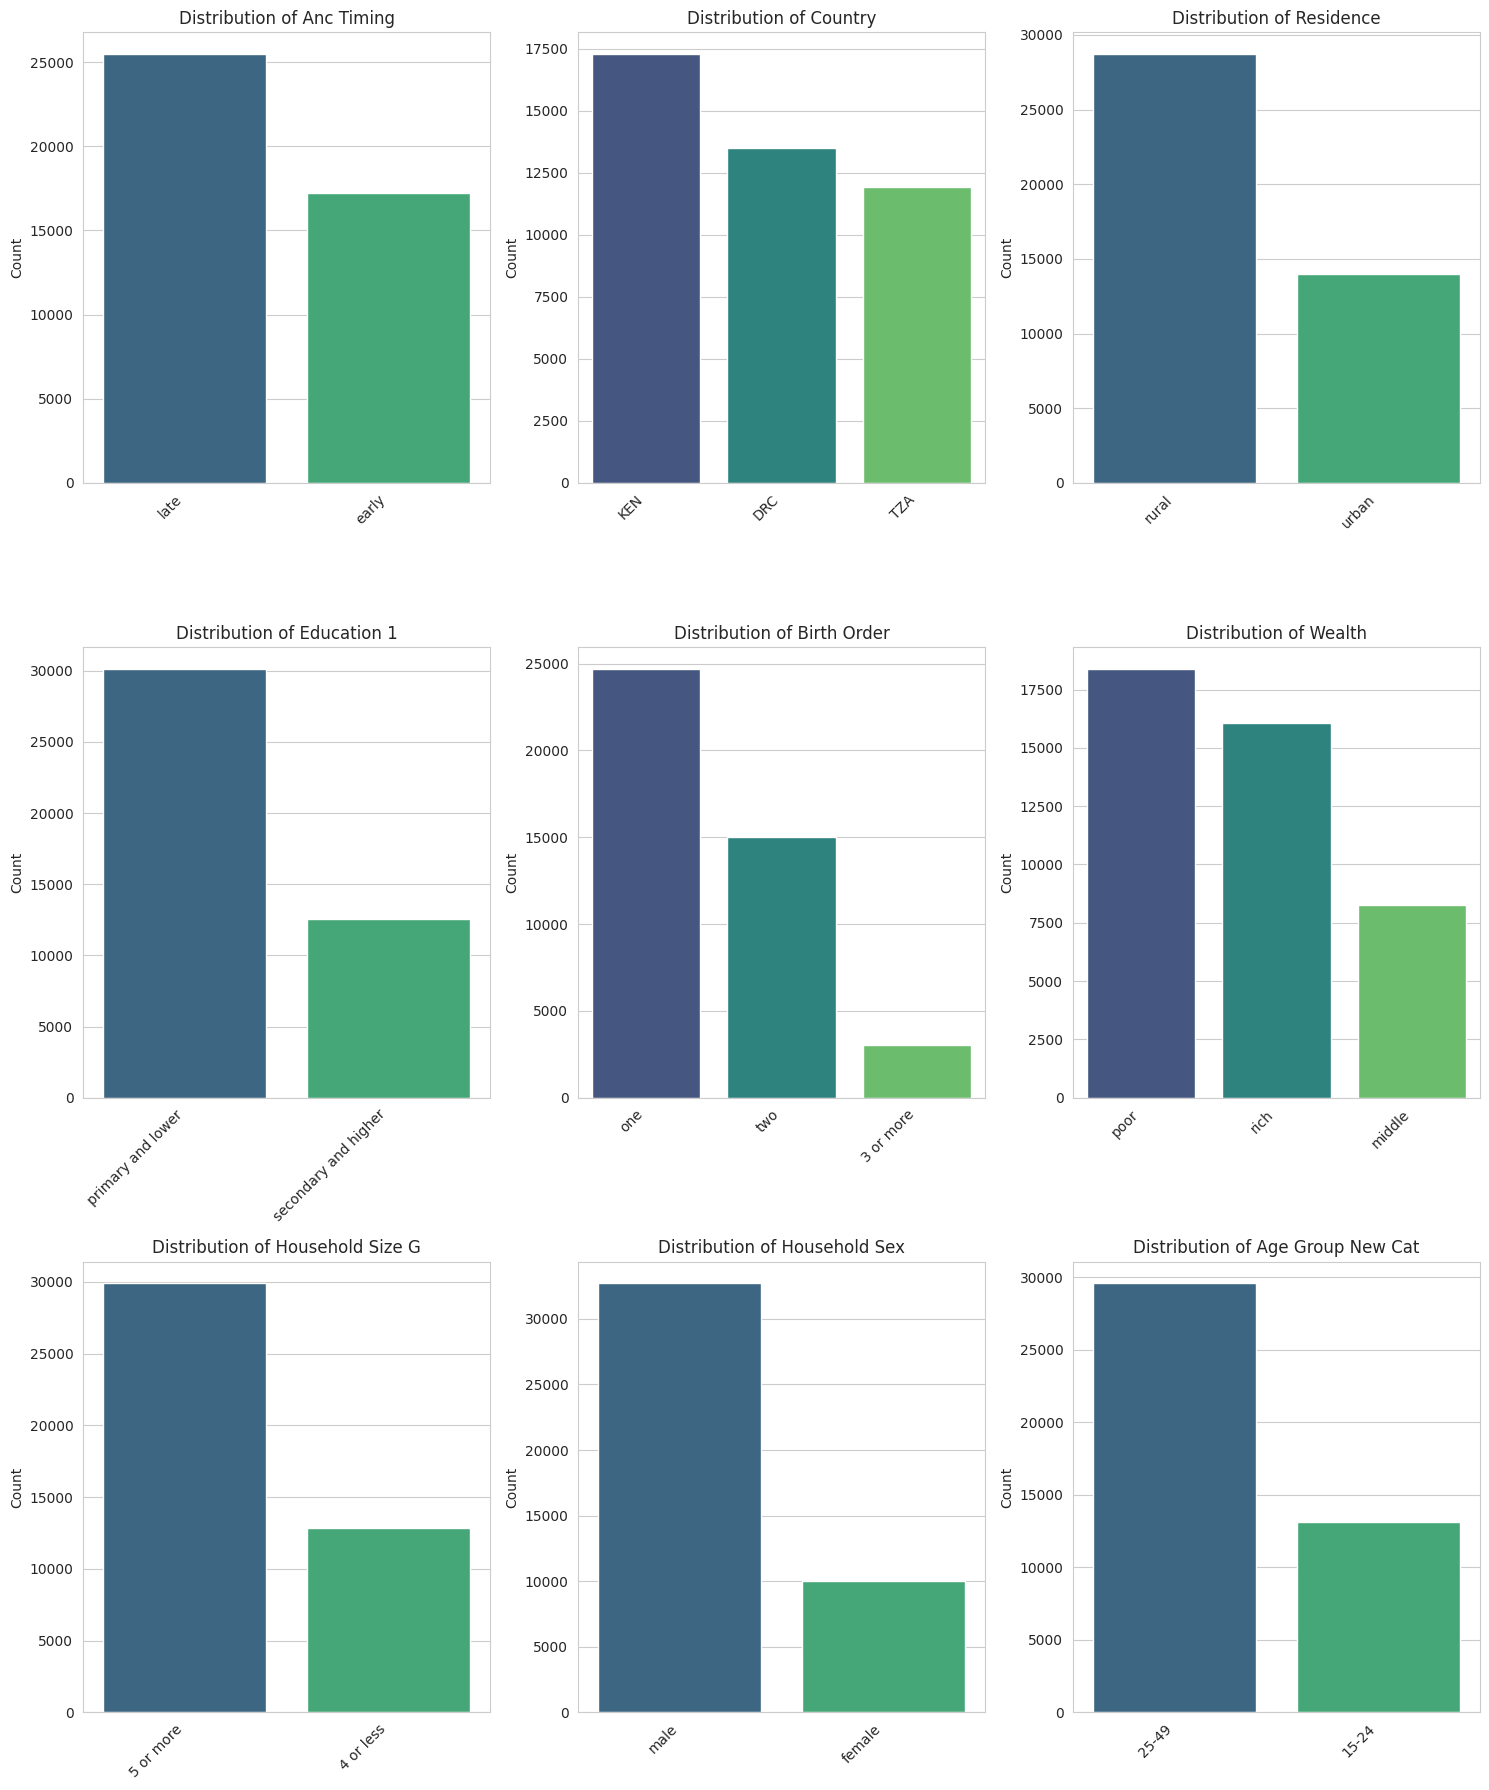

In [6]:
# Set a style for the plots
sns.set_style("whitegrid")

# Define the list of categorical columns for visualization
categorical_cols_for_viz = ['anc_timing', 'country', 'residence', 'education_1', 'birth_order', 'wealth', 'household_size_g', 'household_sex', 'age_group_new_cat']

plt.figure(figsize=(15, 18))
for i, col in enumerate(categorical_cols_for_viz):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', fontsize=12)
    plt.xlabel('') # Remove x-axis label to clean up
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from scipy.stats import randint

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")

Libraries imported successfully!


In [8]:
# Make sure to upload 'East_African_countries_data.csv' to your Colab environment
# or mount your Google Drive if the file is there.
try:
    df = pd.read_csv('East_African_countries_data.csv')
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 5 rows of the dataset:")
    print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
except FileNotFoundError:
    print("Error: 'East_African_countries_data.csv' not found. Please upload the file to your Colab environment or provide the correct path.")
    # In a real notebook, you might want to exit or raise an exception if the file is essential
    # raise SystemExit("Dataset file not found.")

Dataset loaded successfully!
Dataset shape: (42719, 14)

First 5 rows of the dataset:
| psu   | new_psu   | country   | DHSCLUST   | sampwt   | newcaseid_1   | anc_timing   | residence   | education_1          | birth_order   | wealth   | household_size_g   | household_sex   | age_group_new_cat   |
|:------|:----------|:----------|:-----------|:---------|:--------------|:-------------|:------------|:---------------------|:--------------|:---------|:-------------------|:----------------|:--------------------|
| 1     | 1         | DRC       | 1          | 1.0981   | 1 7 4         | early        | urban       | secondary and higher | one           | rich     | 5 or more          | male            | 15-24               |
| 1     | 1         | DRC       | 1          | 1.0981   | 1 19 2        | late         | urban       | secondary and higher | two           | rich     | 5 or more          | male            | 25-49               |
| 1     | 1         | DRC       | 1          | 1.0981   | 

In [9]:
print("\n--- Dataset Information ---")
df.info()

print("\n--- Missing Values Check ---")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\n--- Summary Statistics for Numerical Columns ---")
print(df.describe().to_markdown(numalign="left", stralign="left"))

print("\n--- Summary Statistics for Categorical Columns ---")
print(df.describe(include='object').to_markdown(numalign="left", stralign="left"))


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42719 entries, 0 to 42718
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   psu                42719 non-null  int64  
 1   new_psu            42719 non-null  int64  
 2   country            42719 non-null  object 
 3   DHSCLUST           42719 non-null  int64  
 4   sampwt             42719 non-null  float64
 5   newcaseid_1        42719 non-null  object 
 6   anc_timing         42719 non-null  object 
 7   residence          42719 non-null  object 
 8   education_1        42719 non-null  object 
 9   birth_order        42719 non-null  object 
 10  wealth             42719 non-null  object 
 11  household_size_g   42719 non-null  object 
 12  household_sex      42719 non-null  object 
 13  age_group_new_cat  42719 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 4.6+ MB

--- Missing Values Check ---
|

#EDA
Distribution of Target Variable 'anc_timing'

--- Distribution of 'anc_timing' ---
| anc_timing   | count   |
|:-------------|:--------|
| late         | 25497   |
| early        | 17222   |


/tmp/ipython-input-11-602412978.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='anc_timing', palette='viridis', order=df['anc_timing'].value_counts().index)


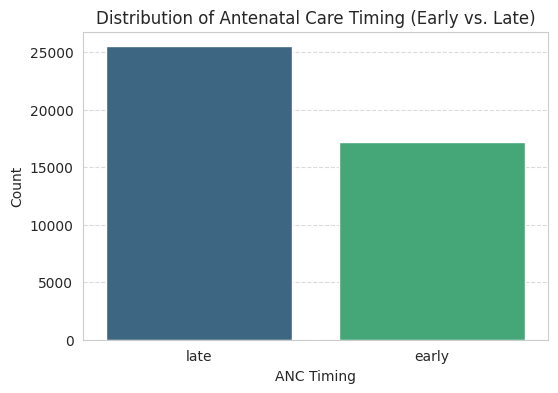

In [11]:
print("--- Distribution of 'anc_timing' ---")
anc_timing_counts = df['anc_timing'].value_counts()
print(anc_timing_counts.to_markdown(numalign="left", stralign="left"))

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='anc_timing', palette='viridis', order=df['anc_timing'].value_counts().index)
plt.title('Distribution of Antenatal Care Timing (Early vs. Late)')
plt.xlabel('ANC Timing')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 Relationship between 'country' and 'anc_timing'


--- Relationship between 'country' and 'anc_timing' ---
| country   | early   | late   |
|:----------|:--------|:-------|
| DRC       | 5438    | 8062   |
| KEN       | 6474    | 10814  |
| TZA       | 5310    | 6621   |


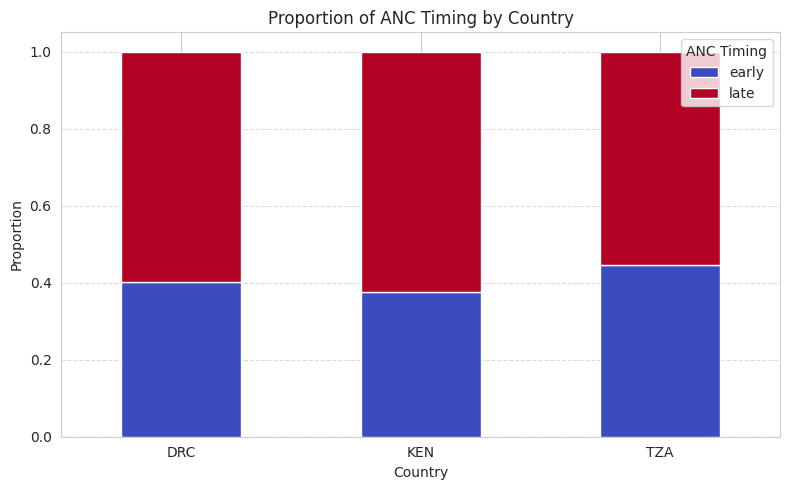

In [12]:
print("\n--- Relationship between 'country' and 'anc_timing' ---")
country_anc_timing_counts = df.groupby(['country', 'anc_timing']).size().unstack(fill_value=0)
print(country_anc_timing_counts.to_markdown(numalign="left", stralign="left"))


country_anc_timing_percent = country_anc_timing_counts.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(8, 5))
country_anc_timing_percent.plot(kind='bar', stacked=True, cmap='coolwarm', ax=plt.gca())
plt.title('Proportion of ANC Timing by Country')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='ANC Timing')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Relationship between 'residence' and 'anc_timing'


--- Relationship between 'residence' and 'anc_timing' ---
| residence   | early   | late   |
|:------------|:--------|:-------|
| rural       | 10853   | 17888  |
| urban       | 6369    | 7609   |


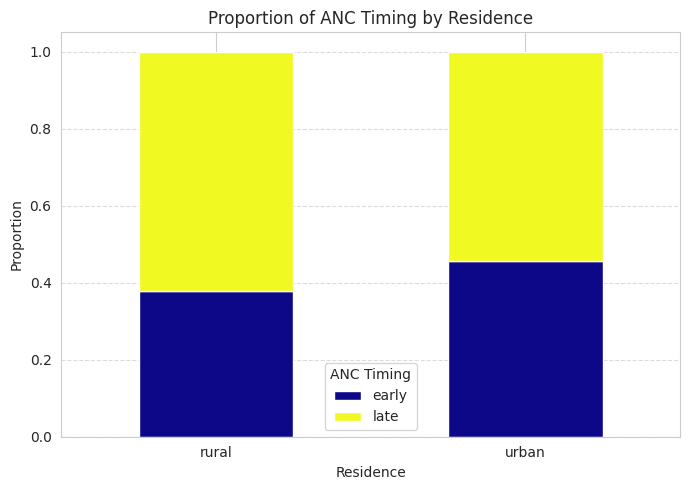

In [13]:
print("\n--- Relationship between 'residence' and 'anc_timing' ---")
residence_anc_timing_counts = df.groupby(['residence', 'anc_timing']).size().unstack(fill_value=0)
print(residence_anc_timing_counts.to_markdown(numalign="left", stralign="left"))


residence_anc_timing_percent = residence_anc_timing_counts.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(7, 5))
residence_anc_timing_percent.plot(kind='bar', stacked=True, cmap='plasma', ax=plt.gca())
plt.title('Proportion of ANC Timing by Residence')
plt.xlabel('Residence')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='ANC Timing')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Relationship between 'education_1' and 'anc_timing'


--- Relationship between 'education_1' and 'anc_timing' ---
| education_1          | early   | late   |
|:---------------------|:--------|:-------|
| primary and lower    | 11322   | 18834  |
| secondary and higher | 5900    | 6663   |


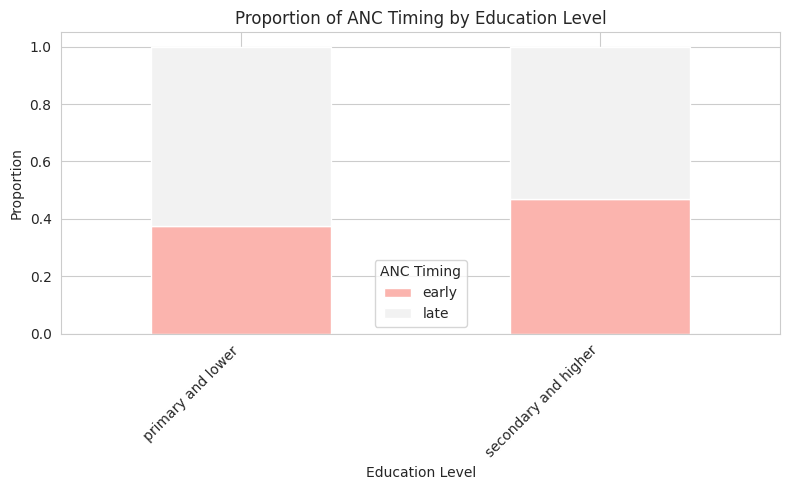

In [14]:
print("\n--- Relationship between 'education_1' and 'anc_timing' ---")
education_anc_timing_counts = df.groupby(['education_1', 'anc_timing']).size().unstack(fill_value=0)
print(education_anc_timing_counts.to_markdown(numalign="left", stralign="left"))

education_anc_timing_percent = education_anc_timing_counts.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(8, 5))
education_anc_timing_percent.plot(kind='bar', stacked=True, cmap='Pastel1', ax=plt.gca())
plt.title('Proportion of ANC Timing by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='ANC Timing')
plt.tight_layout()
plt.show()


Relationship between 'birth_order' and 'anc_timing'


--- Relationship between 'birth_order' and 'anc_timing' ---
| birth_order   | early   | late   |
|:--------------|:--------|:-------|
| 3 or more     | 946     | 2066   |
| one           | 10845   | 13874  |
| two           | 5431    | 9557   |


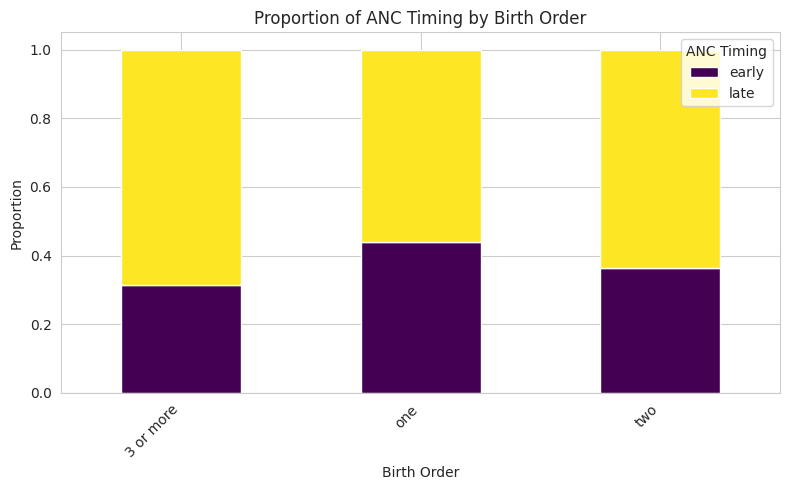

In [15]:
print("\n--- Relationship between 'birth_order' and 'anc_timing' ---")
birth_order_anc_timing_counts = df.groupby(['birth_order', 'anc_timing']).size().unstack(fill_value=0)
print(birth_order_anc_timing_counts.to_markdown(numalign="left", stralign="left"))


birth_order_anc_timing_percent = birth_order_anc_timing_counts.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(8, 5))
birth_order_anc_timing_percent.plot(kind='bar', stacked=True, cmap='viridis', ax=plt.gca())
plt.title('Proportion of ANC Timing by Birth Order')
plt.xlabel('Birth Order')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='ANC Timing')
plt.tight_layout()
plt.show()